# Analyze

## What you learn

Business goalを達成するために現状手に入るデータが必要十分であるか、データ分析を行いAnalysis Reportを作成します。

## Why you need

機械学習モデルの開発には必要十分なデータが必要ですが、何が必要でどれぐらい足りないかをData Scientistが定量的に示さなければステークホルダーは日常業務の合間でどれだけ工数を割けばよいのか見積もることができません。結果として、必要なデータも十分なデータも得られなくなります。Analyzeにより現状のデータの不足と不十分性を定量的に示したAnalysis Reportを作成し、次のPrepareフェーズで必要なステークホルダーに対し依頼を行います。

## How to do

Technical Exerciseで定量的な分析、Communication Exerciseで質問による定性的な分析を行います。

### Technical Exercise

データの必要性と十分性を分析します。

まず一定量のデータがあるかどうかを分析するためデータを読み込みます。  
今回は`house_prices.csv`というデータを渡されているとし、それを`house_price_df`という変数に読み込みます。データの読み込みには`pandas`というライブラリを使用します。

In [1]:
from pathlib import Path
import pandas as pd


raw_data_path = Path("../data/raw/house_prices.csv")
house_price_df = pd.read_csv(raw_data_path, na_values="?")

`info`関数でデータの列名、形式、空白(null)でない値の件数がわかります。

In [2]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

データ件数をプロットすることで空白が多い項目を視覚的に把握することができます。次のコードで、空白データの割合を棒グラフで表示します。

<AxesSubplot:ylabel='index'>

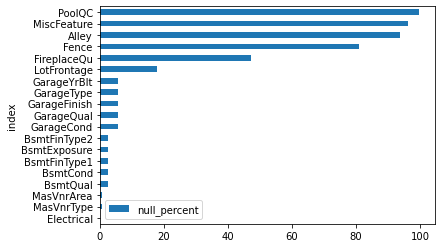

In [3]:
house_price_df\
   .isnull().sum().divide(len(house_price_df)).multiply(100)\
   .reset_index(name="null_percent").query("null_percent > 0.0")\
   .sort_values("null_percent")\
   .set_index("index").plot.barh()

`PoolQC`など上位5つほどは半分以上空白の値があることがわかります。

次に、データの必要性を把握するために、予測したい販売価格(`SalePrice`)との相関を計算します。相関が高い項目がなければ、予測にとって重要なデータが欠けていることを示唆しています。データ項目同士の相関係数は、`corr`関数で計算できます。ただ、相関係数が計算できるのは項目が数値同士の場合のみです。`SalePrice`に対し`SalePrice`自身も含め相関係数を取りプロットします。

<AxesSubplot:>

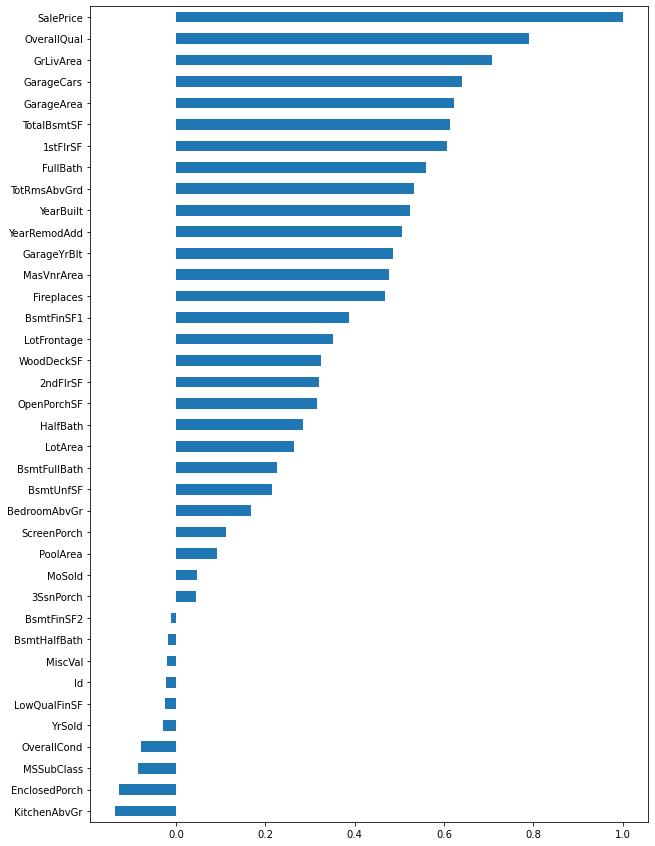

In [4]:
numerical_df = house_price_df.select_dtypes("number")
numerical_df.corr()["SalePrice"].sort_values().plot.barh(figsize=(10,15))

`OverallQual`などの項目が価格の予測に強く影響していることがわかります。

ドロップダウンリストから選ぶようなカテゴリ項目(間取りがA、B、Cの3つどれかなど)は相関係数が計算できません。そのため、ボックスプロットでカテゴリごとに`SalePrice`の分布が変わっていないかを可視化します。

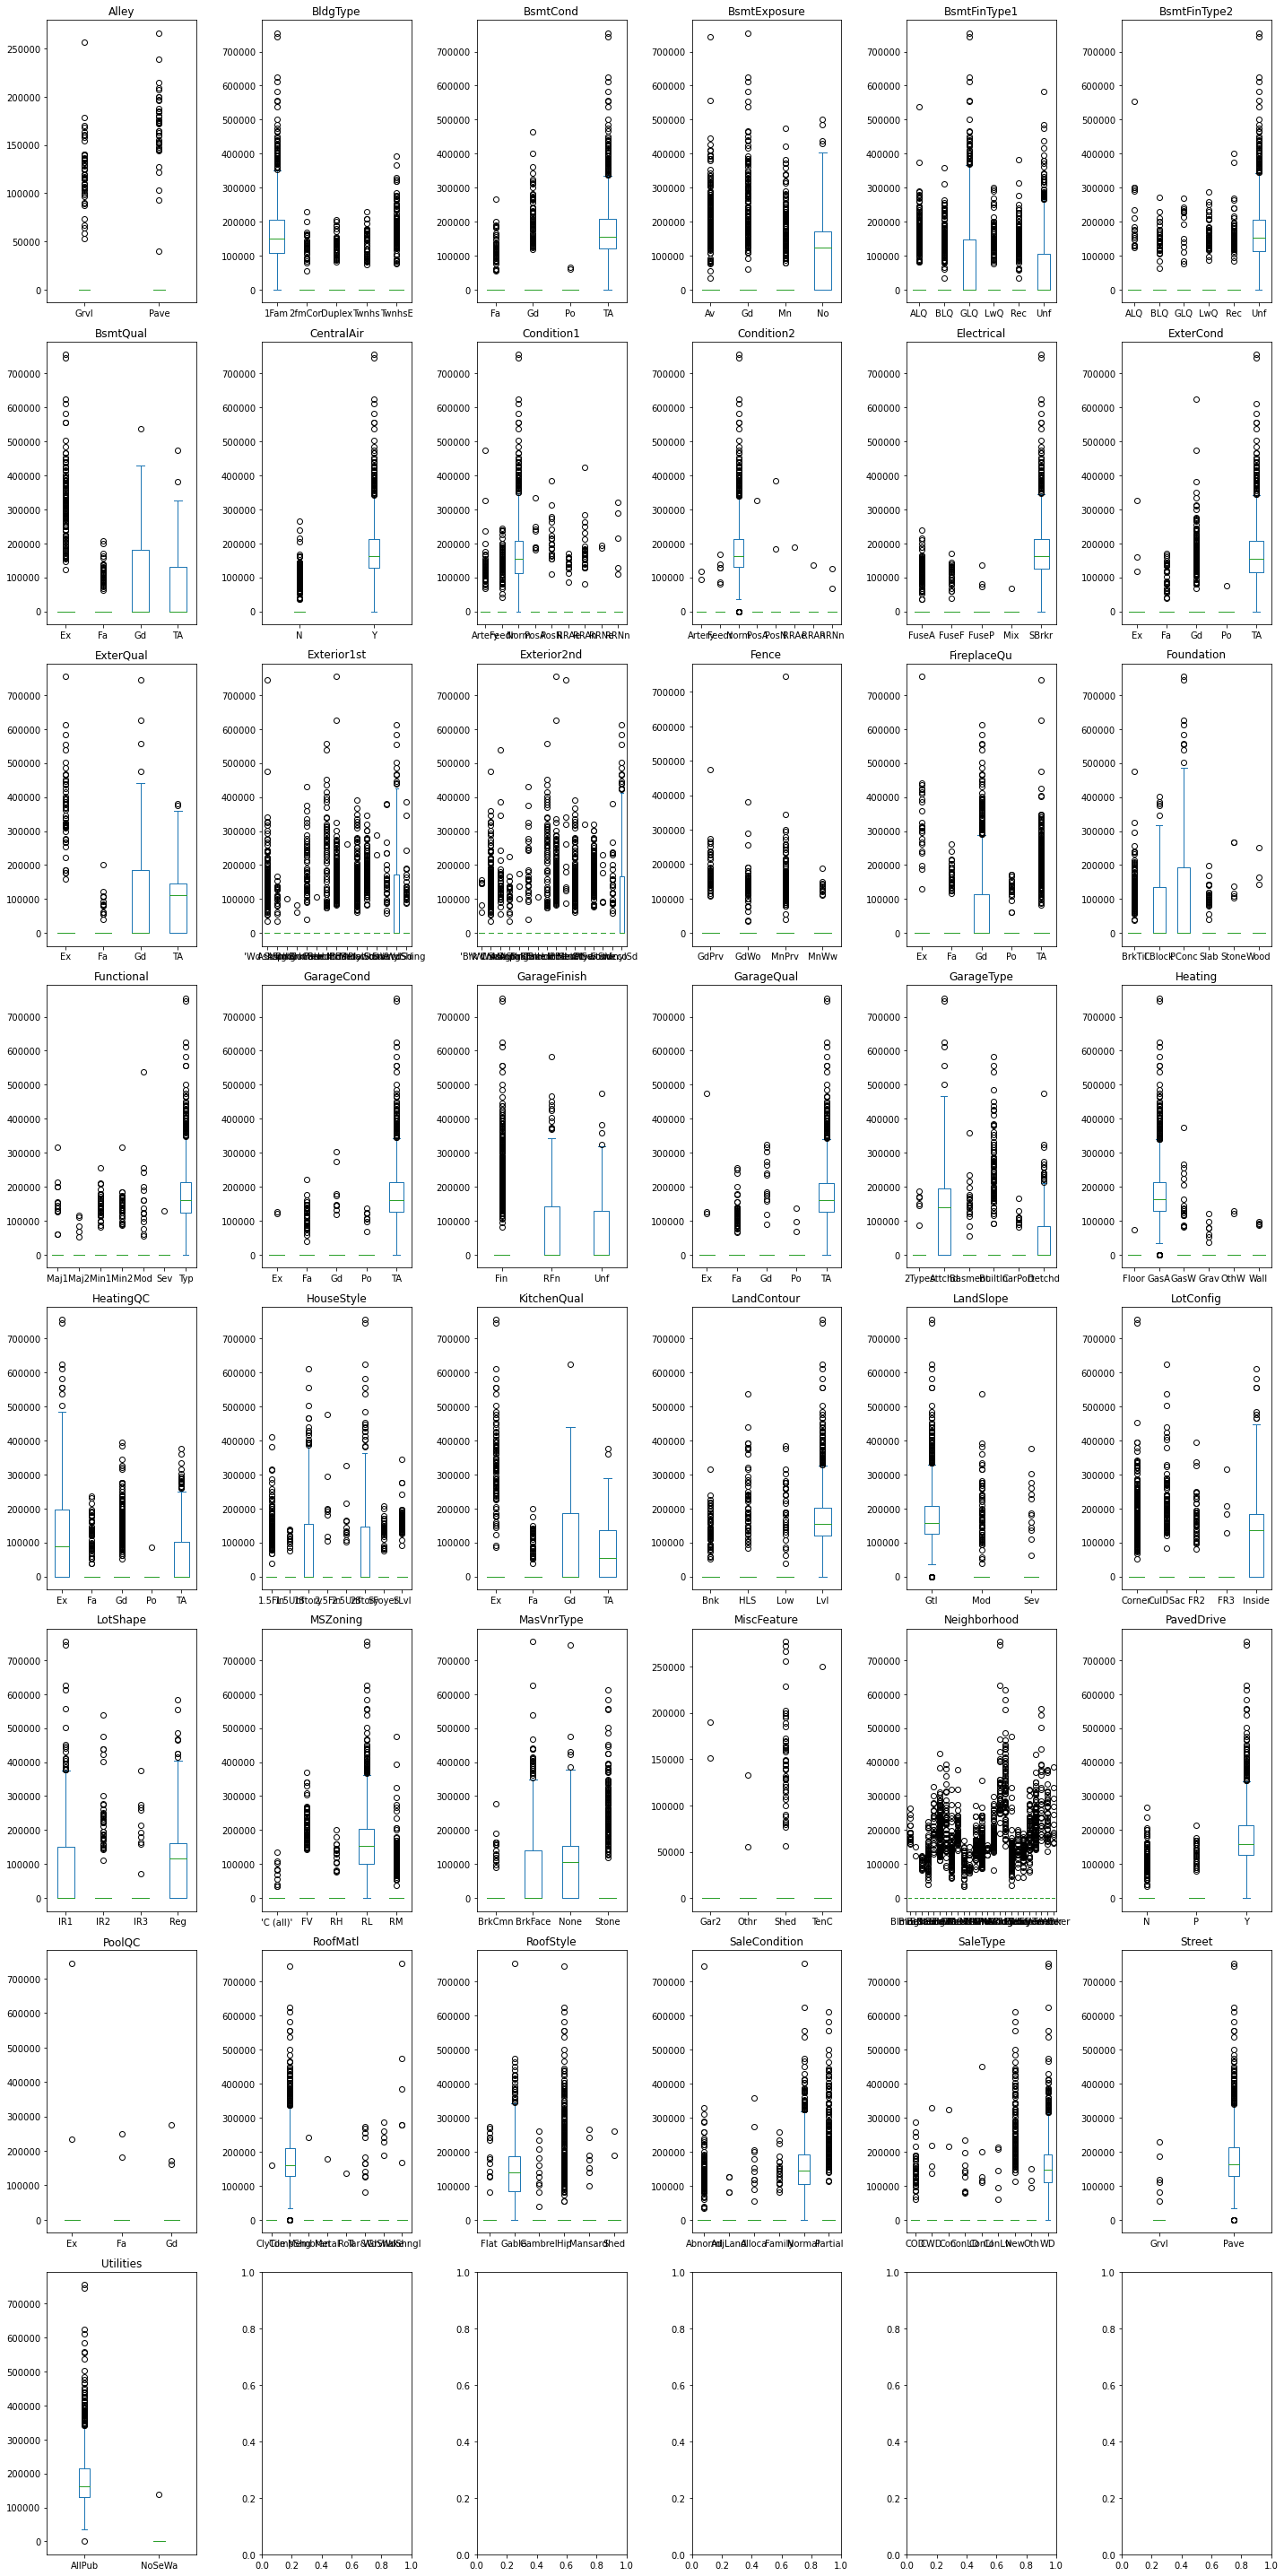

In [17]:
import matplotlib.pyplot as plt


height = 8
width = 6
fig, axes = plt.subplots(nrows=height, ncols=width)
categorical_df = house_price_df[house_price_df.columns.difference(numerical_df.columns)]
for i, column in enumerate(categorical_df.columns):
    row = i // width
    col= i % width
    sale_price_for_each_item = pd.get_dummies(categorical_df[column]).multiply(house_price_df["SalePrice"], axis=0)
    sale_price_for_each_item.plot.box(ax=axes[row, col], figsize=(20, 30), legend=False, title=column)

plt.tight_layout()

項目によってきれいに分布が分かれるようなカテゴリは少なく見えます。また、70万ドルを超える全体からして高額な住宅があることも読み取れます。可視化の分析以外に、簡単な機械学習モデルを使って精度や重要な特徴量を分析するのも有効です。

### Communication Exercise

Data Scientistとして必要十分なデータをそろえるため、誰にどのような質問をする必要がありますか?

* Product Manager
* Business Analyst
* Data Analyst
* Architect 
* DevOps Engineer
* Software Engineer
* Operator
* System Admin
* IT Auditor
* Data architect
* Domain Expert


#### Example

* Domain Expert
   * 欠損が多い`PoolQC`などは本当に値が入っていないか、値が入っていない理由は何か。
   * `OverallQual`などは分析から販売価格に強く影響しているように見えるが感覚と合っているか。
   * カテゴリ項目は価格を決定する要素としては弱いように見えるがどのような項目なのか?
* Data architect/Software Engineer
   * 欠損が多い`PoolQC`などは本当に値が入っていないか、値が入っていない理由は何か。
   * 現在分析に使用しているデータのメタデータ(いつ頃誰が作成したのかなど)を教えてほしい。
* Data Analyst
   * 現在データの分析によく利用している項目は何か。
   
## Next Step

[Prepare](03_prepare.ipynb)

## References

1. [Pandas Cheet Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
2. ゆずたそ and はせりょ. [データマネジメントが30分でわかる本](https://www.amazon.co.jp/%E3%83%87%E3%83%BC%E3%82%BF%E3%83%9E%E3%83%8D%E3%82%B8%E3%83%A1%E3%83%B3%E3%83%88%E3%81%8C30%E5%88%86%E3%81%A7%E3%82%8F%E3%81%8B%E3%82%8B%E6%9C%AC-%E3%82%86%E3%81%9A%E3%81%9F%E3%81%9D-ebook/dp/B085W4YSZJ). 2020.


関連するAWSのサービス

1. DataBrew
2. SageMaker Clarify
3. Athena
4. Redshift
5. QuickSight
